In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [ ]:
# --- Raw Data (Example) ---
# Let's create a sample dataset with numerical features

#np.random.seed(0)
#size = 100
#X1 = np.random.normal(50, 10, size)
#X2 = np.random.normal(30, 5, size)
#noise = np.random.normal(0, 5, size)
# Target variable with some relationship to X1 and X2
#y = 3*X1 + 2*X2 + noise

#df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

df = pd.read_csv('Social_Network_Ads.csv')

# --- Explore Relationships ---
print("Correlation matrix:\n", df.corr(numeric_only=True))
print("\nCovariance matrix:\n", df.cov(numeric_only=True))



Correlation matrix:
                   User ID       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.000721         0.071097   0.007120
Age             -0.000721  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.155238         1.000000   0.362083
Purchased        0.007120  0.622454         0.362083   1.000000

Covariance matrix:
                       User ID           Age  EstimatedSalary    Purchased
User ID          5.134915e+09   -541.682870     1.737143e+08   244.836284
Age             -5.416829e+02    109.890702     5.548738e+04     3.131165
EstimatedSalary  1.737143e+08  55487.380952     1.162603e+09  5924.367168
Purchased        2.448363e+02      3.131165     5.924367e+03     0.230269


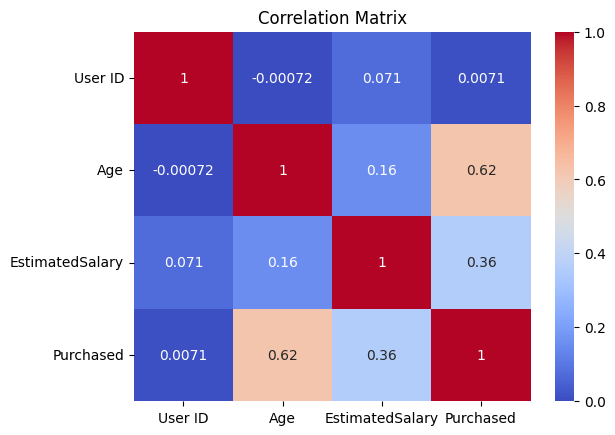

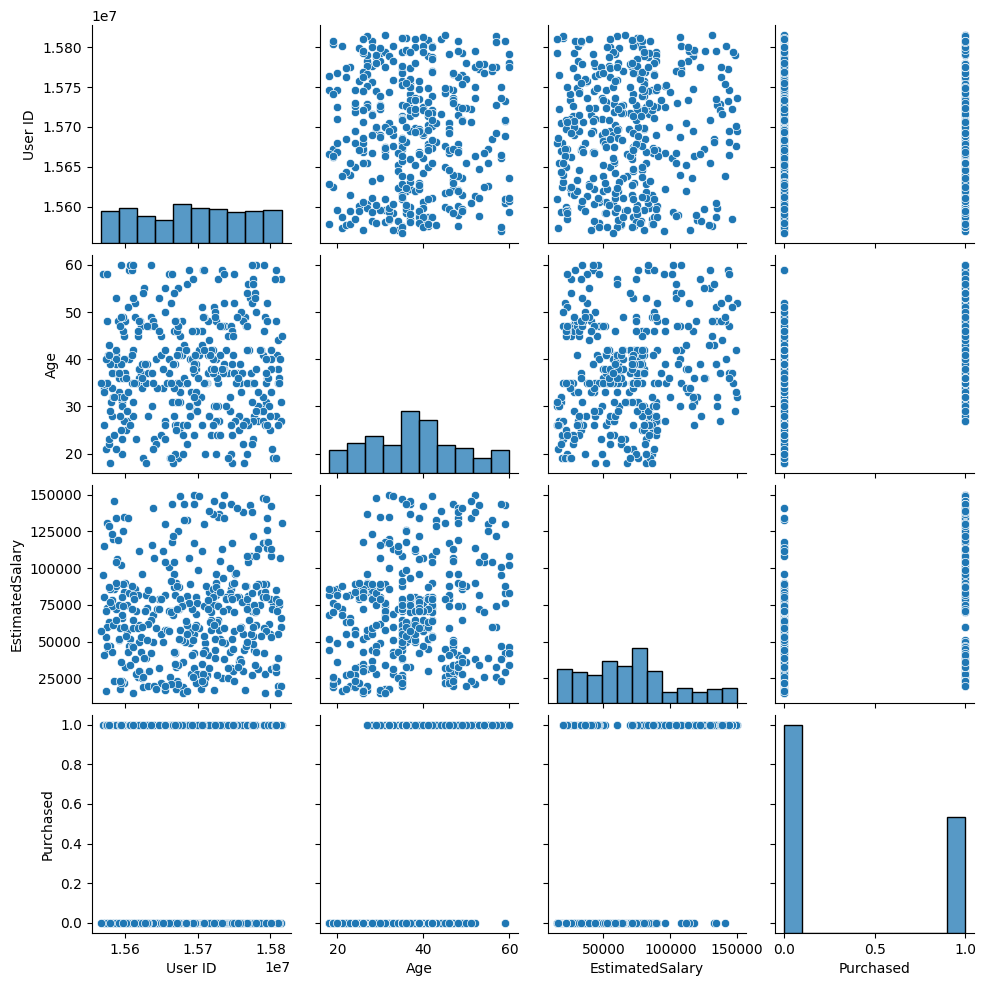

In [10]:
# Visualize correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Check scatter plots to see if patterns exist
sns.pairplot(df)
plt.show()

# --- Is there a pattern worth modeling? ---
# From correlation and scatter plots, likely yes if correlation values are strong.



In [16]:
y = df['Purchased']
# --- Build Model (Linear Regression with Least Squares) ---
X = df[['Age', 'EstimatedSalary']]
model = LinearRegression()
model.fit(X, y)

print("\nCoefficients:")
print(f"Intercept: {model.intercept_}")
print(f"X1 coefficient: {model.coef_[0]}")
print(f"X2 coefficient: {model.coef_[1]}")




Coefficients:
Intercept: -0.9096191649615735
X1 coefficient: 0.026560504728847845
X2 coefficient: 3.828130041177301e-06



R² score: 0.460


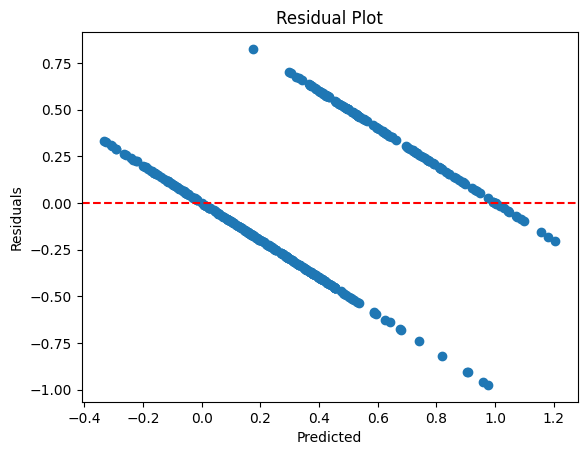

In [17]:
# --- Evaluate Model ---
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"\nR² score: {r2:.3f}")

# Residual plot
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



In [19]:
# --- Make Predictions ---
new_data = pd.DataFrame({'Age': [60, 40], 'EstimatedSalary': [25, 35]})
predictions = model.predict(new_data)
print("\nPredictions for new data:")
print(predictions)


Predictions for new data:
[0.68410682 0.15293501]
